# My Data Science Project


In [2]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Load dataset
data = datasets.load_diabetes(scaled=False)
df = pd.DataFrame(data = data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

# Rounds a column
df['decade'] = df['age'].round(-1)
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,decade
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0,60.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0,50.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0,70.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0,20.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0,50.0


# Single Variable EDA

Most of the varibles' mean is close to the median

Define functions to help with single variable EDA


In [3]:
def single_variable_EDA(df, column_name, analysis_type):
    sns.set(style="whitegrid")
    color_palette = sns.color_palette("colorblind")

    if analysis_type == "categorical":
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))

        # Histogram
        sns.histplot(data=df, x=column_name, ax=ax[0], palette=color_palette)
        ax[0].set_title(f'Distribution of {column_name}')
        ax[0].set_xlabel(column_name)
        ax[0].set_ylabel('Count')

        # Bar Plot
        sns.countplot(data=df, x=column_name, ax=ax[1], palette=color_palette)
        ax[1].set_title(f'Count of each category in {column_name}')
        ax[1].set_xlabel(column_name)
        ax[1].set_ylabel('Count')

        plt.tight_layout()
        plt.show()

    elif analysis_type == "numerical":
        fig, ax = plt.subplots(1, 3, figsize=(18, 6))

        #Box Plot
        sns.boxplot(data=df, x=column_name, ax=ax[0], color=color_palette[0])
        ax[0].set_title(f'Box plot of {column_name}')
        ax[0].set_xlabel(column_name)

        # Histogram
        sns.histplot(data=df, x=column_name, ax=ax[1], kde=True, color=color_palette[1])
        ax[1].set_title(f'Histogram of {column_name}')
        ax[1].set_xlabel(column_name)
        ax[1].set_ylabel('Frequency')

        #Violin Plot
        sns.violinplot(data=df, x=column_name, ax=ax[2], color=color_palette[2])
        ax[2].set_title(f'Violin plot of {column_name}')
        ax[2].set_xlabel(column_name)

        plt.tight_layout()
        plt.show()

    else:
        print("ERROR: Unknown analysis type. Please choose from categorical/numerical.")

### Age 

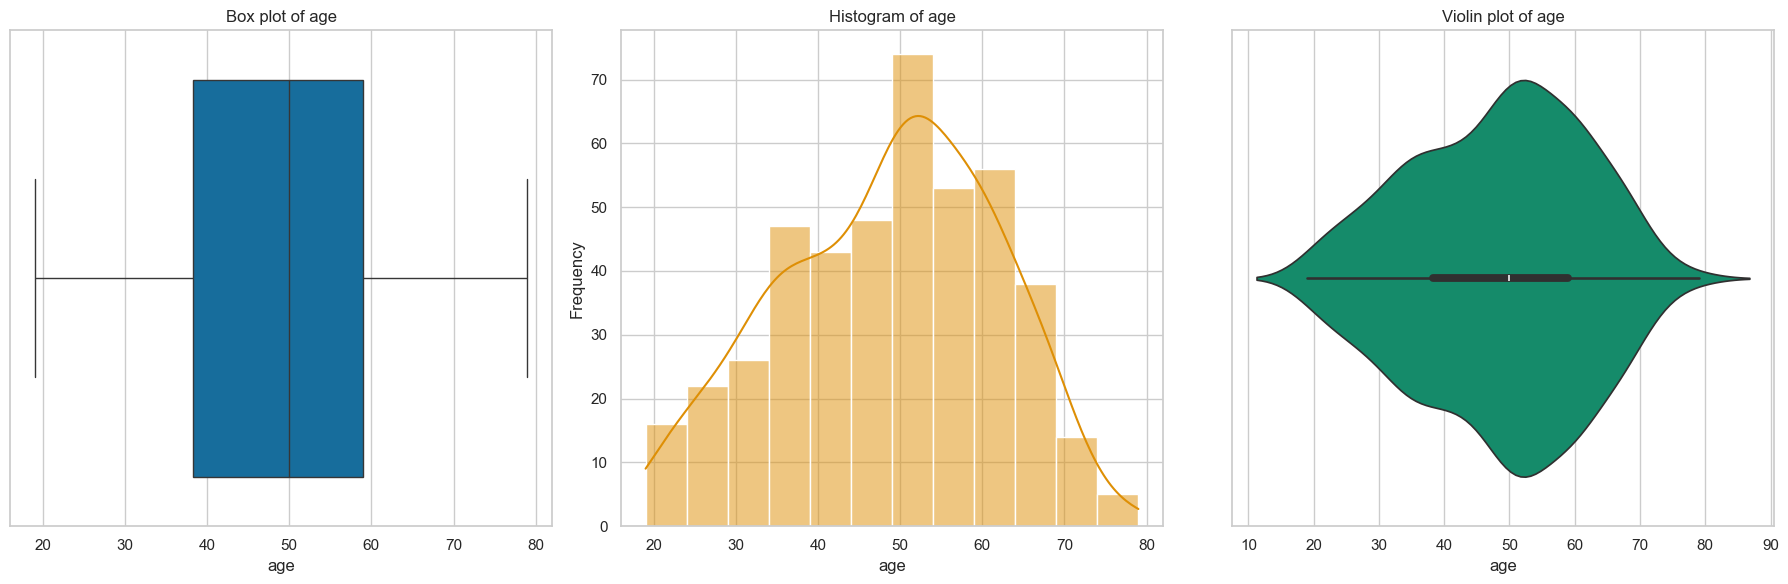

In [4]:
single_variable_EDA(df, "age", "numerical")

### Sex

/var/folders/nw/0j298g817b92m2qlhw1_fwnr0000gn/T/ipykernel_74238/1664914601.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette=color_palette)
/var/folders/nw/0j298g817b92m2qlhw1_fwnr0000gn/T/ipykernel_74238/1664914601.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette=color_palette)
/var/folders/nw/0j298g817b92m2qlhw1_fwnr0000gn/T/ipykernel_74238/1664914601.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column_name, ax=ax[1], palette=color_palette)


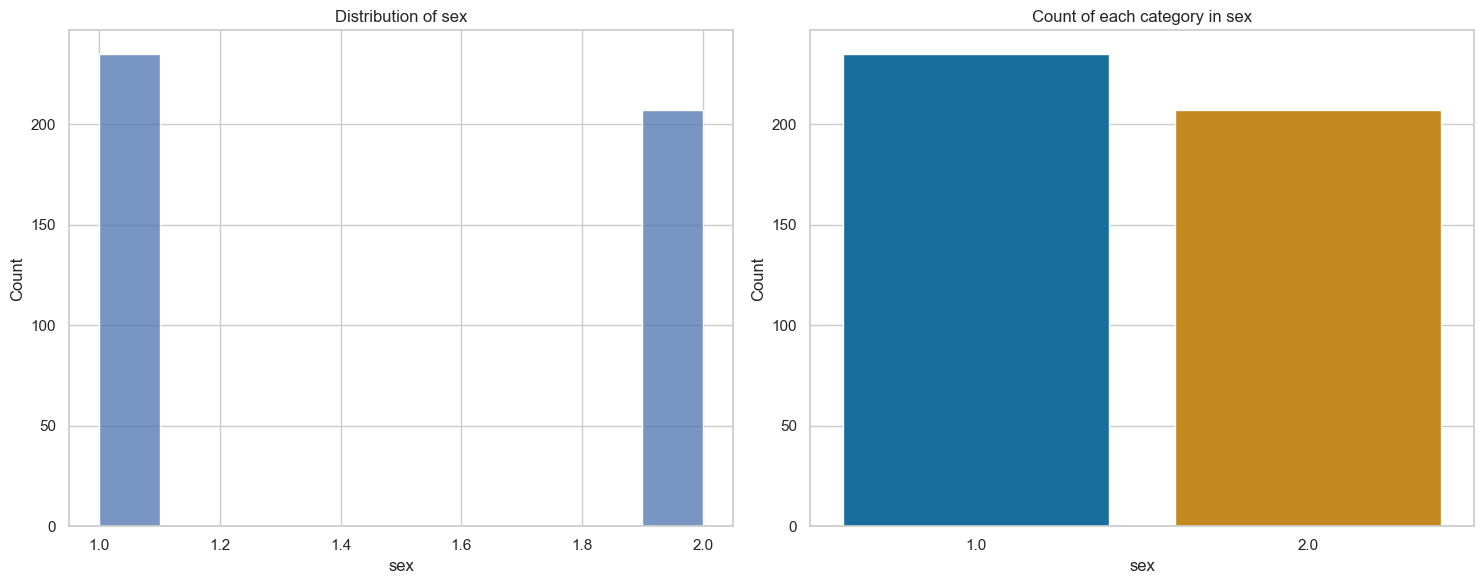

In [5]:
single_variable_EDA(df, "sex", "categorical")

## Pairwise EDA

aka Bi-variate analysis. Focus on features to target

In [6]:
def pairwise_eda(df, feature, target, analysis_type):
    if analysis_type == "num2num":
        sns.scatterplot(data=df, x=feature, y=target)
        plt.title(f'Scatter Plot: {feature} vs {target}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()
        correlationcoeff = df[feature].corr(df[target])
        print(f'Correlation is {correlationcoeff}')
    elif analysis_type == "cat2num":
        sns.boxplot(data=df, x=feature, y=target)
        plt.title(f'Box Plot: {feature} vs {target}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()
        correlationcoeff = df[feature].corr(df[target])
        print(f'Correlation is {correlationcoeff}')
    else:
        print("analysis_type must be either 'num2num' or 'cat2num'")

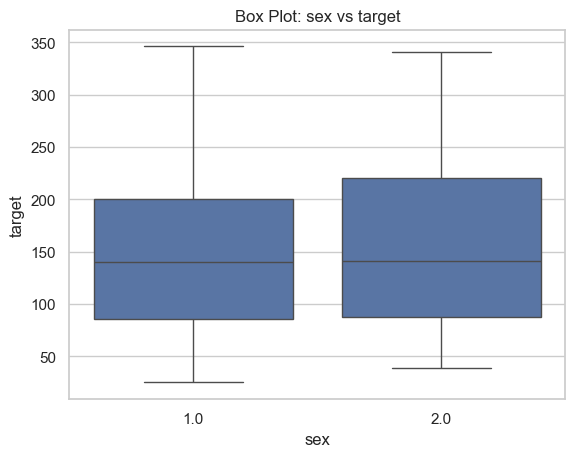

Correlation is 0.04306199845160536


In [7]:
pairwise_eda(df, "sex", "target", analysis_type="cat2num")

In [8]:
df['decade'] = df['age'] // 10

# Queries using SQL

In [9]:
import pandasql as ps
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,decade
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0,5.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0,4.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0,7.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0,2.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0,5.0


## Counts for Each Sex

Notes: In examining the difference between COUNT(*) and COUNT('sex'), we can see that the data contains no NULL values

In [10]:
query = """

SELECT
    sex, COUNT(*) as Counts
    
FROM 
    df
GROUP BY
    sex
"""
ps.sqldf(query, locals()).set_index("sex")


,Counts
sex,
1.0,235
2.0,207


## Average BMI of each sex

Analysis: The BMI of males and females look pretty similar 

In [11]:
query = """

SELECT 
    sex as Sex, AVG(BMI) as Average_BMI

FROM 
    df
GROUP BY
    sex



"""
avg_bmi = ps.sqldf(query, locals()).set_index("Sex")
avg_bmi


,Average_BMI
Sex,
1.0,26.010638
2.0,26.790338


## Average BMI of each sex and decade 

Analysis: 
- slight upward trend as age increases
- lack of data for young persons

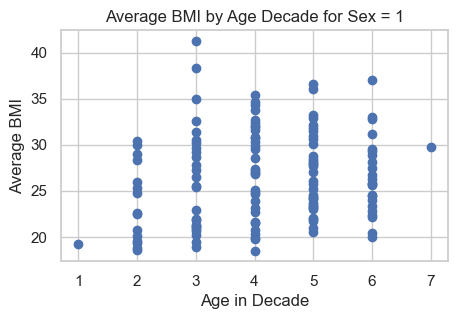

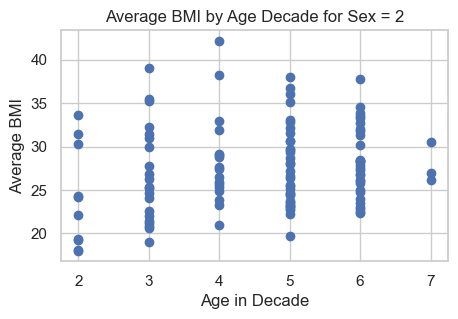

In [12]:
query = """

SELECT
    sex as Sex, decade as Age_in_Decade , AVG(BMI) as Average_BMI
FROM
    df
GROUP BY
    sex, BMI
ORDER BY
    sex, decade

"""
sex_age = ps.sqldf(query, locals()).set_index(['Sex', 'Age_in_Decade'])

just_1 = sex_age.loc[1]
just_2 = sex_age.loc[2]

# Plot the data
plt.figure(figsize=(5, 3))
plt.scatter(just_1.index, just_1['Average_BMI'], marker='o', linestyle='-', color='b')
plt.title('Average BMI by Age Decade for Sex = 1')
plt.xlabel('Age in Decade')
plt.ylabel('Average BMI')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.scatter(just_2.index, just_2['Average_BMI'], marker='o', linestyle='-', color='b')
plt.title('Average BMI by Age Decade for Sex = 2')
plt.xlabel('Age in Decade')
plt.ylabel('Average BMI')
plt.grid(True)
plt.show()



## Counts of each sex with BMI greater than the average BMI.

Analysis: Nothing too out of the oridinary since sex = 1 has more than sex = 2

In [15]:
# print(avg_bmi)

bmi_avg = df['bmi'].mean()
# print(bmi_avg)

query = f""" 

SELECT 
    sex  , COUNT(*)
FROM
    df
WHERE
    bmi > {bmi_avg}
GROUP BY
    sex

    
"""

ps.sqldf(query, locals())

,sex,COUNT(*)
0,1.0,101
1,2.0,94


## Sum total BMI across each decade and sex

In [ ]:
query = """ 

SELECT
    decade as Age_in_Decade, sex as Sex , AVG(bmi), COUNT(*)
FROM 
    df
GROUP BY
    decade, sex

"""
ps.sqldf(query, locals()).set_index(['Age_in_Decade',"Sex"])

AVG(bmi)  COUNT(*)
Age_in_Decade Sex                     
1.0           1.0  22.566667         3
2.0           1.0  23.744444        27
              2.0  24.071429        14
3.0           1.0  25.829268        41
              2.0  26.475000        32
4.0           1.0  26.005000        60
              2.0  26.962162        37
5.0           1.0  26.652459        61
              2.0  27.112500        64
6.0           1.0  26.605263        38
              2.0  27.309615        52
7.0           1.0  29.520000         5
              2.0  26.062500         8

In [ ]:
sql_query = """ 
-- get average bmi per gender

SELECT
    sex, AVG(bmi) as avg_bmi
FROM
    df
GROUP BY
    sex

"""
ps.sqldf(sql_query, locals())

,sex,avg_bmi
0,1.0,26.010638
1,2.0,26.790338
